In [ ]:
'''ASSIGNMENT NO. 5
    Implement logistic regression using Python/R to perform classification on
    Social_Network_Ads.csv dataset.
    Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on
    the given dataset'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

data = pd.read_csv("Social.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


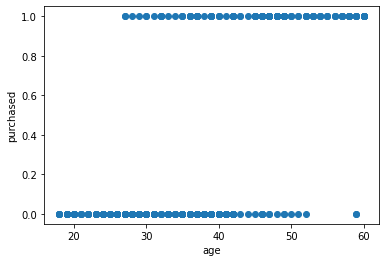

In [3]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.xlabel("age")
plt.ylabel("purchased")
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'],test_size=0.20)

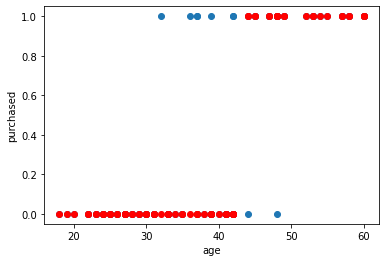

Accuracy = 0.8875


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1).ravel())
#making prediction
y_pred_sk = model.predict(X_test.values.reshape(-1, 1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.xlabel("age")
plt.ylabel("purchased")
plt.show()
print(f"Accuracy = {model.score(X_test.values.reshape(-1, 1),y_test.values.reshape(-1, 1))}")

In [5]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sk).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  49
False Positives:  2
False Negatives:  7
True Positives:  22


In [7]:
#Accuracy
#Precision : It is the ‘Exactness’, ability of the model to return only relevant instances.
#Recall : It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity.
#Error rate :Error rate (ERR) is calculated as the number of all incorrect predictions (FN + FP) divided by the total number of the dataset (P + N).

Accuracy = (tn+tp)*100/(tp+tn+fp+fn)
print("Accuracy {:0.2f}%:".format(Accuracy))


Precision = tp*100/(tp+fp)
print("Precision {:0.2f}%".format(Precision))


Recall = tp*100/(tp+fn)
print("Recall {:0.2f}%".format(Recall))


err = (fp + fn)*100/(tp + tn + fn + fp)
print("Error rate {:0.2f}%".format(err))

Accuracy 88.75%:
Precision 91.67%
Recall 75.86%
Error rate 11.25%
